In [1]:
import argparse
import cv2
import os
import logging
import uuid
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skew
from utilities.AutomaticSegmentation import *

Seed point: [358.20512974 399.39563438]
Seed point: [218.88571429 303.54065934]
Seed point: [180.58810573 261.44933921]
Seed point: [206.88671744 250.59883307]
Seed point: [141.52175184 223.66485642]
Seed point: [210.48300229 249.43464767]
Seed point: [434.33920705 332.37665198]
Seed point: [122.00716631 214.61397875]
Seed point: [146.84678803 150.03801825]
Seed point: [117.68767314 255.20720234]
Seed point: [130.84306985 209.63089079]


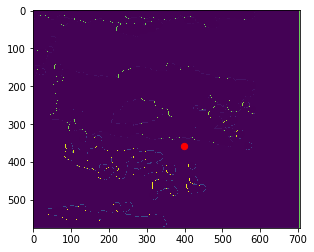

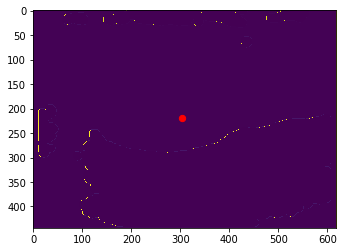

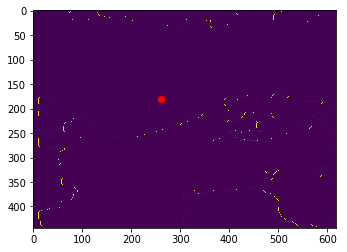

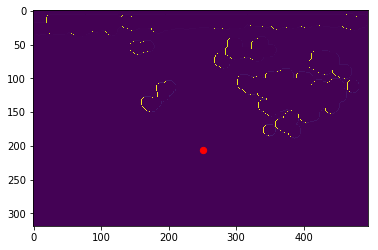

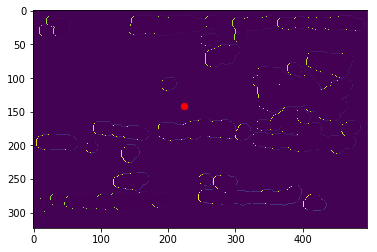

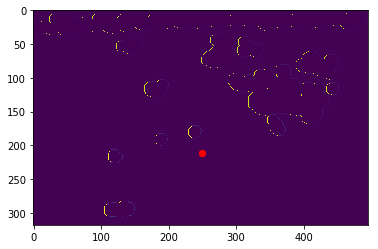

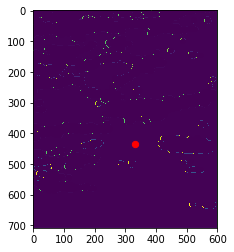

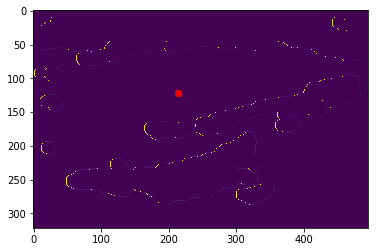

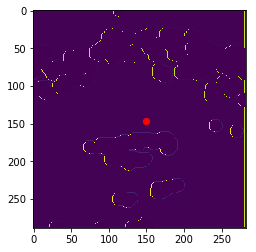

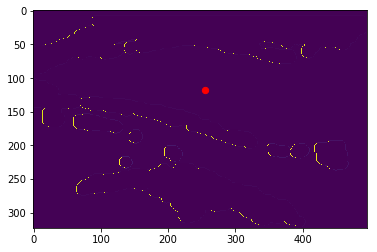

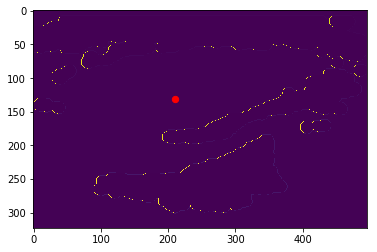

In [18]:
# n = len(os.listdir("TestImages/bank"))
# c = 2
# r = (n // 2) + 1

# GAUSSIAN???
# kernel = np.ones((16, 16))

BOUNDARY_EXPAND = 30 # px
MAX_DILATION_ROUNDS = 5
CC_CONNECTIVITY = 8  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(16, 16))

base_path = "../TestImages/bank"

def __seed_point_in_rectangle(seed_pt, rect):
    x,y,w,h = rect
    return (
        seed_pt[1] > x and 
        seed_pt[1] < x + w and
        seed_pt[0] > y and 
        seed_pt[0] < y + h
    )

def __rectangle_area(rect):
    return rect[2] * rect[3]

for impath in os.listdir(base_path):
    
    path_to_image = "{}/{}".format(base_path, impath)
    img = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
    seed_pt, ref_pt, enh = get_ROI(img)

    enh_gray = (enh*255).astype(np.uint8)
    
#     I_rc = cv2.bitwise_not(cv2.morphologyEx(
#         enh_gray, 
#         cv2.MORPH_OPEN, 
#         kernel))

    I_rc = cv2.morphologyEx(
        enh_gray, 
        cv2.MORPH_CLOSE, 
        kernel)
   
    otsu_thresh, img_morph = cv2.threshold(I_rc, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # bin_thresh, img_morph = cv2.threshold(I_rc, 0,255, cv2.THRESH_BINARY)
    
    im2, contours, hierarchy = cv2.findContours(
        img_morph,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE)
    
    br = [cv2.boundingRect(c) for c in contours]
    
    print("Seed point: {}".format(seed_pt))

    # Find all bounding rectangles of contours that contain the seed point
    br = [r for r in br if __seed_point_in_rectangle(seed_pt, r)]
            
    # Map all rectangles to areas
    areas = [__rectangle_area(r) for r in br]
    
    # Select the smallest contour bounding the seed point as the ROI
    min_rect = br[np.argmin(areas)]
    
    x,y,w,h = min_rect
    
    x_exp = img.shape[1] // 20
    y_exp = img.shape[0] // 20
    
    cv2.rectangle(
        img,
        (max(x - x_exp, 0), max(0, y - y_exp)),
        (min(x + w + x_exp, img.shape[1]), min(y + h + y_exp, img.shape[0])),
        255,
        2)
    
    plt.figure()
    plt.scatter(x=seed_pt[1], y=seed_pt[0], s=40, c='r')
    plt.imshow(img)
#     plt.colorbar()

#     cv2.drawContours(img, contours, cont_ind, (0,255,0), 3)



In [ ]:
def __determine_bounding_region(image, seed_point):
    
    I_rc = cv2.bitwise_not(cv2.morphologyEx(
        image, 
        cv2.MORPH_OPEN, 
        kernel))
    
    plt.imshow(I_rc)
    img_morph = cv2.threshold(I_rc, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # You need to choose 4 way simple connectivity
    connectivity = 4  
    # Perform the operation
    output = cv2.connectedComponentsWithStats(img_morph, connectivity, cv2.CV_32S)
    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]
    
    print(labels)
    print(stats)

In [ ]:
img = cv2.imread("TestImages/bank/b39c6fb0-0f53-46d8-a0f2-455870676378.png", cv2.IMREAD_GRAYSCALE)
rp, enh = get_ROI(img)
max_p, post_cands = __get_seed_point(enh, rp, nd=12, h=20, eps=1)

kernel = np.ones((16, 16),np.uint8)
# I_ro = cv2.erode(img, kernel = se, iterations = 1)
# I_ro_c = cv2.bitwise_not(I_ro)

# I_rc = cv2.bitwise_and(I_ro_c, I_ro_c, mask = cv2.bitwise_not(cv2.dilate(I_ro, kernel = se, iterations = 1)))
I_rc = cv2.bitwise_not(cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel))

ret3,th3 = cv2.threshold(I_rc, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret3)
plt.imshow(th3)
plt.colorbar()

In [4]:
%matplotlib

Using matplotlib backend: MacOSX
